# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting our data, organizing it, and ensuring it is well defined. 

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

Our client is Big Mountain (a/k/a "the Client", "the Company"), a Montana-based ski resort. Management at Big Mountain suspects it may not be maximizing its return on investment (ROI) relative to its peers in the market. Furthermore, Company insiders also lack a strong sense of which facilities matter most to visitors, particularly ones for which skiers are likely to pay more. This project aims to build a predictive model for ticket price based on resort assets so as to assist the company in maximizing its ROI, while at the same time providing intel on which assets are most valued by customers. The latter will guide Big Mountain's capital expenditure decisions going forward.

### 2.2.2 Introduction To Notebook<a id='2.2.2_Introduction_To_Notebook'></a>

In this notebook, we try to use well structured, helpful headings that are frequently self-explanatory. We do our best to include brief notes after any results and highlight key takeaways.

## 2.3 Imports<a id='2.3_Imports'></a>

As per usual, we being with our imports.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from library.sb_utils import save_file


## 2.4 Objectives<a id='2.4_Objectives'></a>

The following are fundamental questions to resolve in this notebook before we move on.

* Do we have the data we need to tackle the desired question?

    * Have we identified the required target value?
    * Do we have potentially useful features?
 
* Do we have any fundamental issues with the data?

## 2.5 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [16]:
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

Below, we do an initial audit of the data.

In [17]:
ski_data.info

<bound method DataFrame.info of                                   Name   Region    state  summit_elev  \
0                       Alyeska Resort   Alaska   Alaska         3939   
1                  Eaglecrest Ski Area   Alaska   Alaska         2600   
2                     Hilltop Ski Area   Alaska   Alaska         2090   
3                     Arizona Snowbowl  Arizona  Arizona        11500   
4                  Sunrise Park Resort  Arizona  Arizona        11100   
..                                 ...      ...      ...          ...   
325               Meadowlark Ski Lodge  Wyoming  Wyoming         9500   
326          Sleeping Giant Ski Resort  Wyoming  Wyoming         7428   
327                   Snow King Resort  Wyoming  Wyoming         7808   
328  Snowy Range Ski & Recreation Area  Wyoming  Wyoming         9663   
329                White Pine Ski Area  Wyoming  Wyoming         9500   

     vertical_drop  base_elev  trams  fastEight  fastSixes  fastQuads  quad  \
0           

The output above tells us we have a multi-state data set with various data types, in addition to a number of missing values.

Since we are working with data from multiple states, let's determine which states dominate the market for snow skiing.

In [18]:
ski_data['state'].value_counts()

New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
New Hampshire     16
Wisconsin         16
Vermont           15
Minnesota         14
Utah              13
Idaho             12
Montana           12
Massachusetts     11
Washington        10
Oregon            10
New Mexico         9
Maine              9
Wyoming            8
North Carolina     6
Ohio               5
Connecticut        5
Nevada             4
West Virginia      4
Illinois           4
Virginia           4
Alaska             3
Iowa               3
Indiana            2
New Jersey         2
Arizona            2
Missouri           2
South Dakota       2
Tennessee          1
Rhode Island       1
Maryland           1
Name: state, dtype: int64

New York, Michigan, and Colorado are our top three markets for ski resorts. Montana, the state in which our target resort is located, ranks 12th.

The data set contains two ticket prices: `AdultWeekday` and `AdultWeekend`. Returning to our fundamental question of whether or not we have identified our target variable, we can only say, no, not quite yet. We have, however, narrowed it down to two candidates. We will revisit -- and definitively answer -- this question after reviewing more of our data. 

The output below indicates our ski-resort data are well organized. We have plausible column headings and can see one of the many missing values noted earlier. 

Aside from the `AdultWeekday` and `AdultWeekend` data, the remaining columns are potential "features" (i.e., independent variables) we might include in a statistical/machine learning model. But are all of the features useful? It's difficult to tell how many features will be useful to us at this stage, however, the data look promising. For example, the `vertical_drop` at a resort would be of interest to any prospective skier. Intuitively, we know that high drops should be more popular among seasoned skiers than lower drops. `SkiableTerrain_ac` is manifestly important because it measures the acreage available for skiing. `NightSkiing_ac` measures the amount of acreage available for skiing during a particular part of the day, which implies some resorts may offer guests the opportunity to extend their ski day into the night. Resorts with more skiing acreage and skiing opportunities should be preferable to low acreage resorts that offer only daytime skiing. So, looking at these three variables alone, high numbers are preferred to lower ones. Hence, resorts offering large vertical drops, ample skiing terrain, and the opportunity to ski at night should command a price premium relative to resorts that do not.

We examined all features in the manner described above, asking ourselves if it was reasonable to assume any given variable could affect ticket price(s). We ultimately concluded all features could be potentially useful and should be retained for further analysis.  

While the number of features used in any model will likely be lower than the total number of features available to us, we have answered one of our aforementioned fundamental questions: We have the data we need to answer our research question. Furthermore, should we find ourselves wanting for a piece of information, we can always supplement what we have with external data.

In [19]:
pd.options.display.max_columns = None
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Finding Our Resort Of Interest<a id='2.6.1_Find_Our_Resort_Of_Interest'></a>

Our resort of interest is Big Mountain Resort. Let's explore the data we have on the property.

In [20]:
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


Our resort doesn't appear to have any missing values, which is terrific! Missing values do, however, exist in our data frame.

### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Counting the number of missing values in each column and sorting them could help us determine if a feature should be kept or eliminated from our data set.

In [21]:
missing = pd.concat([ski_data.isnull().sum(), 100*ski_data.isnull().mean()], axis = 1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


`fastEight` is missing the most values, at just over 50%. Our potential target variables, `AdultWeekend` and `AdultWeekday`, are not immune to the problem of missing values. 15% to 16% of ticket prices are missing values. `AdultWeekday` is missing in a few more data points than `AdultWeekend`. 

A natural question to ask is whether there is any overlap between the sets of missing `AdultWeekend` and `AdultWeekday` tickets. Restated, are any resorts missing prices for both types of tickets?

In [22]:
print(str(len(ski_data[(ski_data.AdultWeekday.isnull()) & (ski_data.AdultWeekend.isnull())])) + " resorts are missing both AdultWeekend and AdultWeekDay prices. Only one such resort is in Montana.")

47 resorts are missing both AdultWeekend and AdultWeekDay prices. Only one such resort is in Montana.


47 resorts are missing entries for both types of ticket prices. Is there any other missing data, which is often coded with unusual or extreme values like -1 or 999.  As shown below, none of our data are coded as such. We are now confident we have a grasp on how much data is missing.  Note that, in this data frame, a feature coded as 0 could make sense. Hence, we've opted not to assume that zeros are a proxy for missing data.

In [23]:
 ski_data[np.isin(ski_data, [-1, 999]).any(axis=1)].T

""
Name
Region
state
summit_elev
vertical_drop
base_elev
trams
fastEight
fastSixes
fastQuads


### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

Thus far, we've examined only the numeric features. We'll now turn our attention to categorical data such as resort `Name` and `state`.

Categorical data is often coded as an `object`. Hence, gathering together the object columns in our feature space is a reasonable place to begin our investigation.

In [24]:
# Find columns of type 'object'
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


We saw earlier that these three columns had no missing values. Other issues, however, could be present.

* Is `Name` always (or at least a combination of Name/Region/State) unique?
* Is `Region` always the same as `state`?

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

We need to know if all resort names are unique. Duplicate names could result in double counting of values, which could lead us to draw erroneous conclusions.

In [25]:
# Find duplicate resort names
ski_data['Name'].value_counts().head()

Crystal Mountain    2
Alyeska Resort      1
Brandywine          1
Boston Mills        1
Alpine Valley       1
Name: Name, dtype: int64

All resort names are not unique. We see there are two resorts named Crystal Mountain. This warrants further investigation. We'll use our `Region` and `state` data to broaden our understanding of what we are witnessing.

In [26]:
# Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
dtype: int64

Since `value_counts()` sorts in descending order, our application of the `head()` method, which returns the first five rows of a data frame, implies the rest of the counts must also be 1. Consequently, we know there is only one Crystal Lake in any given region. But what about a view of the data from the state level?

The two Crystal Mountain resorts are in different states. We see this is the case in the output below. 

In [27]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,3,2,0,2,8,58.0,3.0,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,1,2,2,0,10,57.0,1.0,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


The duplicated resort name was not an error. There are two distinct resorts with the same name that reside in different states and regions. 

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

The meaning of `Region` is not immediately obvious. Are regions the same as states? What's the relationship between a `Region` and a `state`? In how many cases do the two variables differ?

In [28]:
# Calculate the number of times Region does not equal state
print("A resort's region and state are different " + str((ski_data.Region != ski_data.state).sum()) + ' times.')
print('Hence, the answer to the question posed above is no: Regions and states are not always the same.')

A resort's region and state are different 33 times.
Hence, the answer to the question posed above is no: Regions and states are not always the same.


Below, we tabulate the number of distinct regions, in search of insight into how 1) the term region is defined and 2) where the regions can be found. 

In [29]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

A casual inspection of the data reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. From this, we can infer that states can contain one or more regions.

In [30]:
(ski_data[ski_data.Region != ski_data.state].groupby('state')['Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

Further digging reveals that California has the most regions: 20 are called Sierra Nevada and just 1 is referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

Because a few states are partitioned into multiple regions, there are slightly more unique regions than states.

In [31]:
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

Below, we examine where our resorts are located.

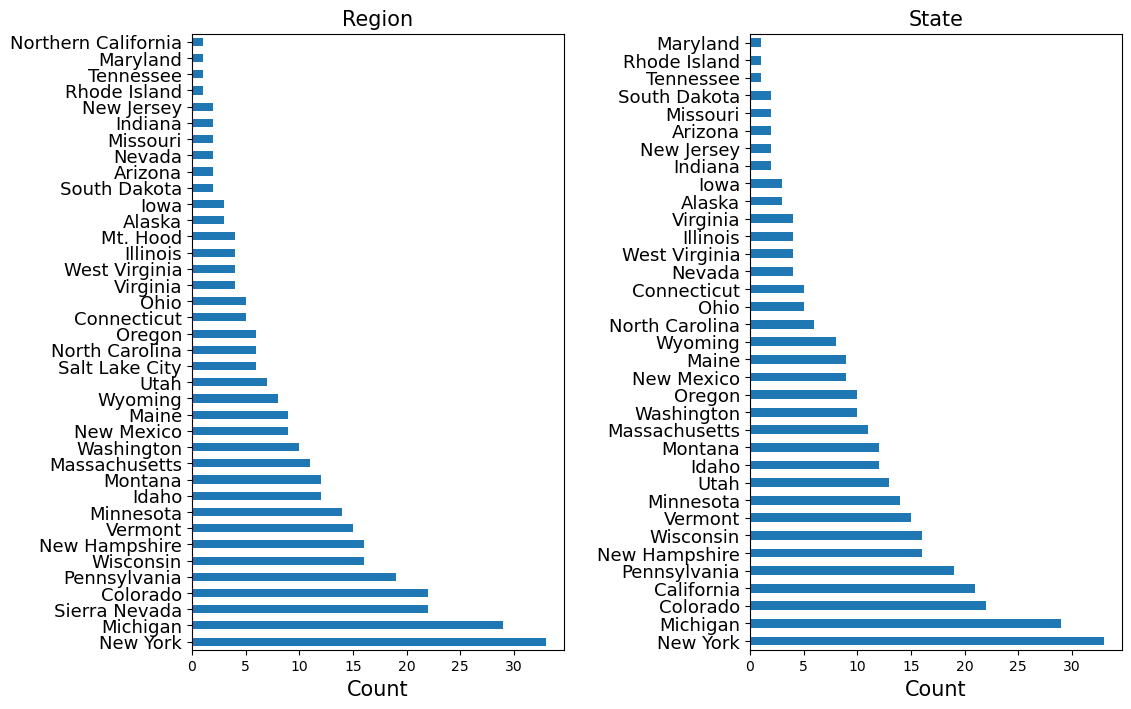

In [32]:
# Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))

# Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])

# Give the plot a helpful title of 'Region'
ax[0].set_title('Region', fontsize=15)

# Label the xaxis 'Count'
ax[0].set_xlabel('Count', fontsize=15)

# Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])

# Give the plot a helpful title of 'state'
ax[1].set_title('State', fontsize=15)

# Label the xaxis 'Count'
ax[1].set_xlabel('Count', fontsize=15)

# Change label size inspired by https://stackoverflow.com/questions/6390393
ax[0].tick_params(axis='y', which='major', labelsize=13)
ax[1].tick_params(axis='y', which='major', labelsize=13)

# Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

Clearly, New York accounts for the majority of resorts. Our client's resort is in Montana, which ranks 11th by region and 12th by state. We should think carefully about how, or whether, we use this information. Does New York command a premium because of its proximity to a large population center? Even if a resort's `State` were a useful predictor of ticket price, our main interest lies in Montana. Would we want a model that is skewed for accuracy by New York? Should we just filter for Montana and create a Montana-specific model? This would slash our available data volume. It's impossible to resolve this issue at present. We will circle back to it later in our study and stick to data wrangling (a/k/a "cleaning") for the moment.

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

Our primary focus is Big Mountain resort in Montana. A salient question to ask is whether or not the state in which a resort is located gives us any clue as to what our primary target variable should be (weekend or weekday ticket prices)? Restated, what do `AdultWeekday` and `AdultWeekend` prices look like across state lines?

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

A quick glance at average ticket prices across states for both `AdultWeekday` and `AdultWeekend` reveals weekday prices are consistently lower than weekend prices, with few exceptions.

In [33]:
# Calculate average weekday and weekend price by state and sort by the average of the two
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head(16)

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000
Idaho,56.555556,55.900000
Illinois,35.000000,43.333333
Indiana,45.000000,48.500000
Iowa,35.666667,41.666667


Below, we present a visualization of the tabular data above. This will further illuminate the relationship between `AdultWeekday` and `AdultWeekend` prices.

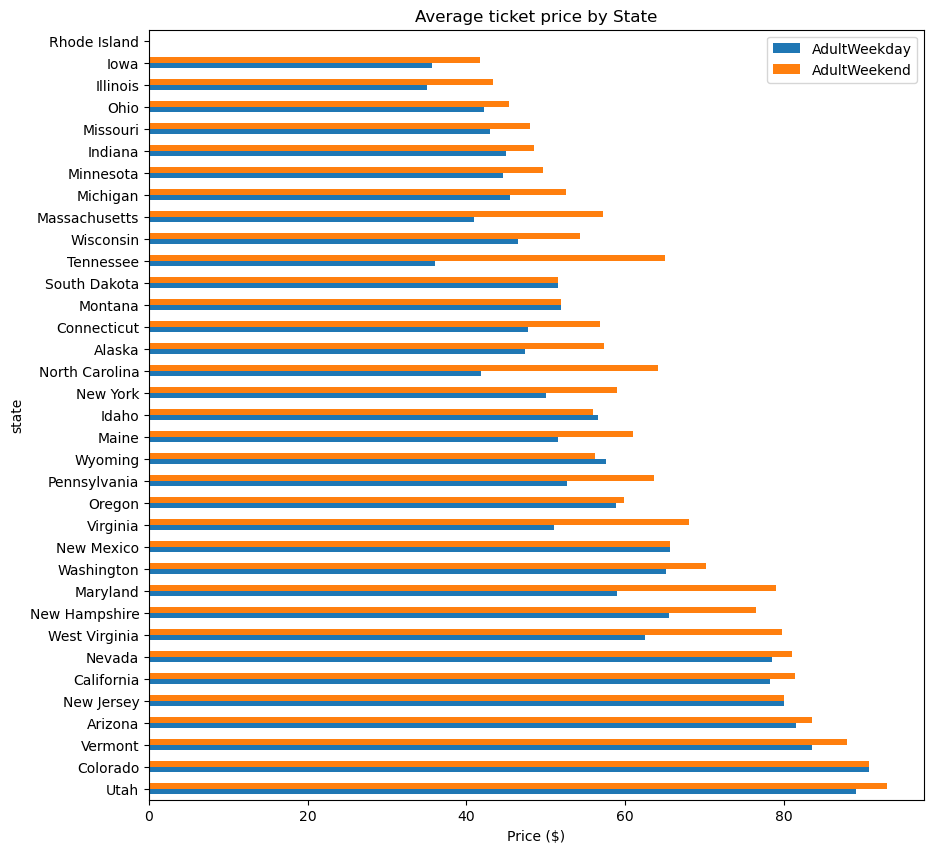

In [34]:
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

The figure above represents a data frame with two columns: one for the average price of each kind of ticket. This tells us how average ticket prices varies from state to state. We can, however, get more insight into the difference in the distributions between states.

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Here, we transform (i.e., melt) our data frame into one in which there is a single column for price with a new categorical column that represents the ticket type.

In [35]:
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], id_vars='state', var_name='Ticket', value_vars=['AdultWeekday','AdultWeekend'], value_name='Price')

In [36]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


Our ticket price and state data are now in a format we can pass to [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the ticket price distributions for each ticket type by state.

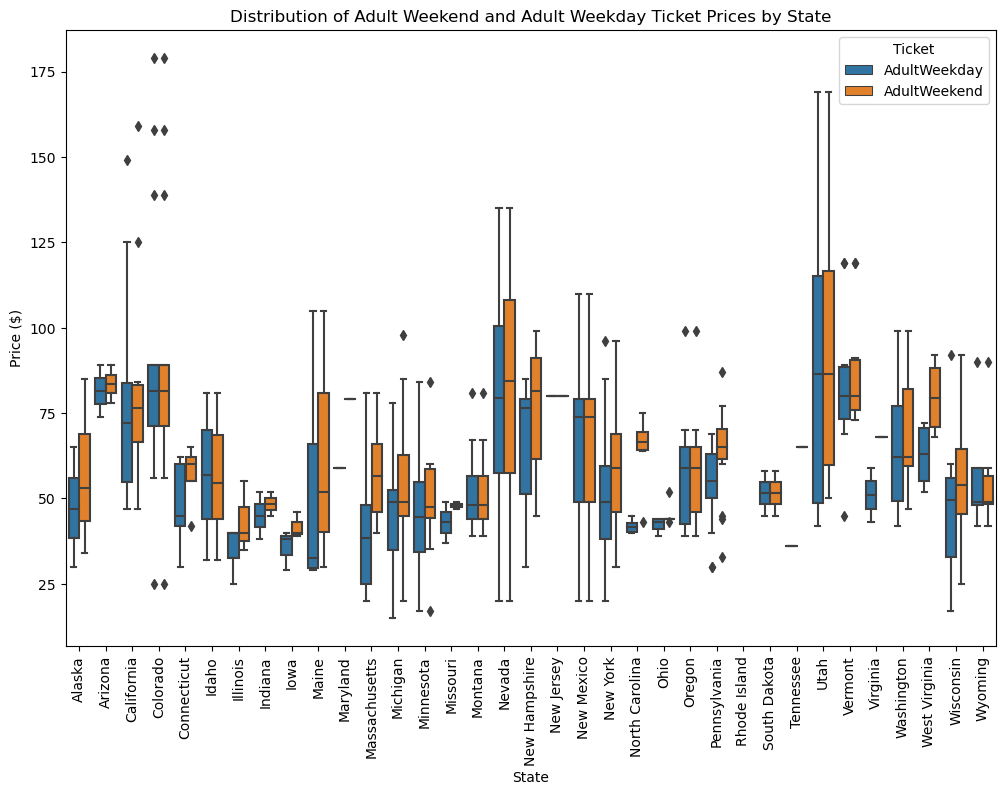

In [37]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State')
plt.title('Distribution of Adult Weekend and Adult Weekday Ticket Prices by State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around $25 to $125. Some states show more variability than others. Montana and South Dakota, for example, both show fairly little price variance. Nevada and Utah, on the other hand, exhibit significant price variability.

This exploration returns us to one of our fundamental questions: Do we have a target variable? We could model one ticket price, both prices, or use the difference between the two as a feature. Furthermore, how should we use our `State` data? There are several options including the following:

* disregard `State` completely
* retain all `State` information
* retain `State` in the form of Montana vs not Montana, as our target resort is in Montana
* examine states that abut Montana only

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

In this section, we turn our attention to cleaning numeric features not discussed earlier.

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

Below, we present a statistical summary of numeric features.

In [38]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Recall, we're missing the ticket prices for ~16% of resorts. This will require us to drop those records. Still, we may have a weekend price and not a weekday price or vice versa.  For now, we want to keep any price data we have.

In [39]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket prices, 3% are missing one price, and 14% are missing both. Ultimately, we will drop the records for which we have no price information, however, we will not do so until we discern whether, or not, useful information about the distributions of other features lies in that 14% of the data.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Although we are still in the 'data wrangling' phase of our study, rather than exploratory data analysis, looking at feature distributions is warranted. Here, we examine whether distributions look plausible or wrong.

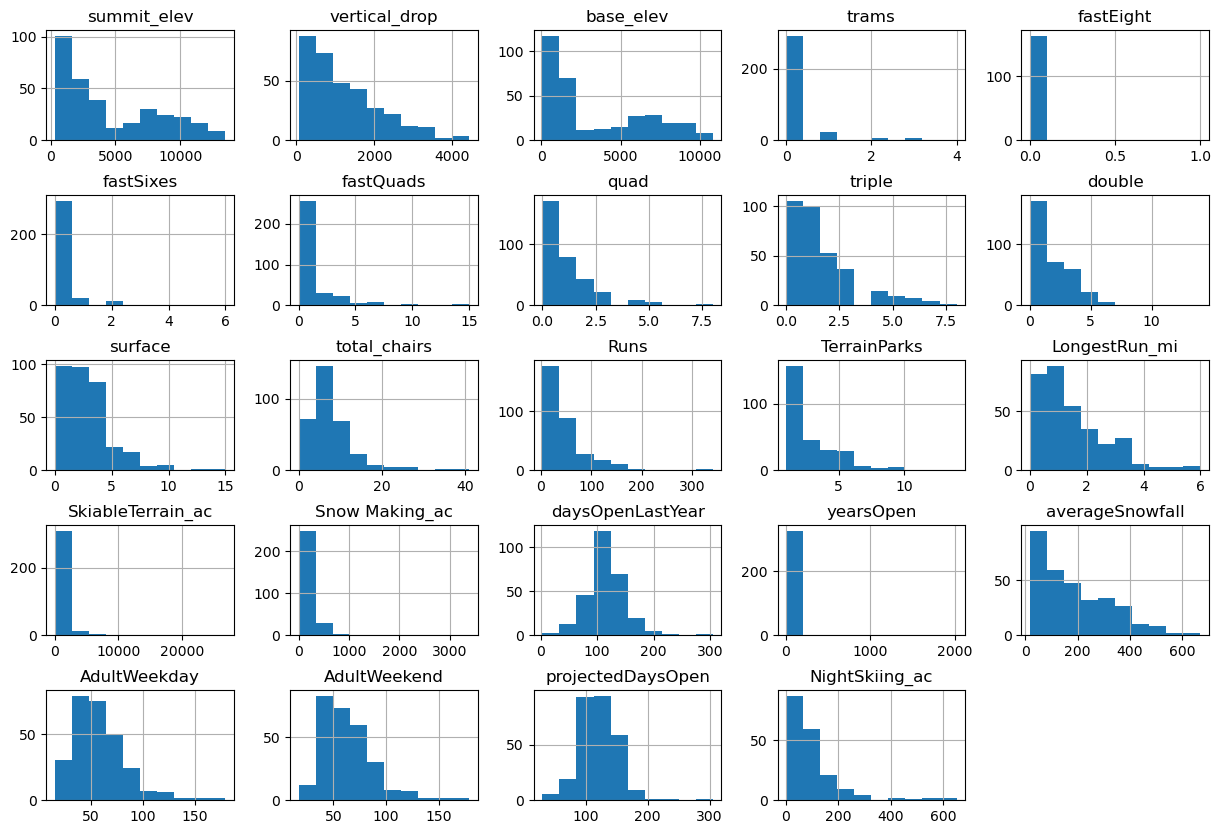

In [40]:
# `hist` method used to plot histograms of each of the numeric features w/ figsize and space between plots specified
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

What features do we have possible cause for concern about and why?

* `SkiableTerrain_ac` because values are clustered down the low end,
* `Snow Making_ac` for the same reason,
* `fastEight` because all but one value is 0 so it has very little variance, and half the values are missing,
* `fastSixes` raises a red flag; it has more variability, but still mostly 0,
* `trams` also may get a red flag for the same reason,
* `yearsOpen` because most values are low but it has a maximum of 2019, which strongly suggests someone recorded a calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

The distribution of skiable terrain looks odd. As it so happens, one resort has a massive amount of skiable terrain: Silverton Mountain, Colorado.

In [41]:
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


We'll Google this resort to see if there is anything unusual to be found at [Silverton](https://www.google.com/search?q=silverton+mountain+skiable+area).

Spot checking the data, we see our top and base elevation values agree, but the skiable area is blatantly wrong. Our data set says this value is 26,819, but the value we've just looked up is 1,819. The last three digits agree. This looks like human error. We can confidently replace the incorrect value with the one we've just found. Had we access to the client, we would report this back and ask for the correction.

In [42]:
# Print the 'SkiableTerrain_ac' value only for this resort w/ .loc
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [43]:
# Modify this value with the correct value
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [44]:
# Verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

What does the distribution of skiable area look like now?

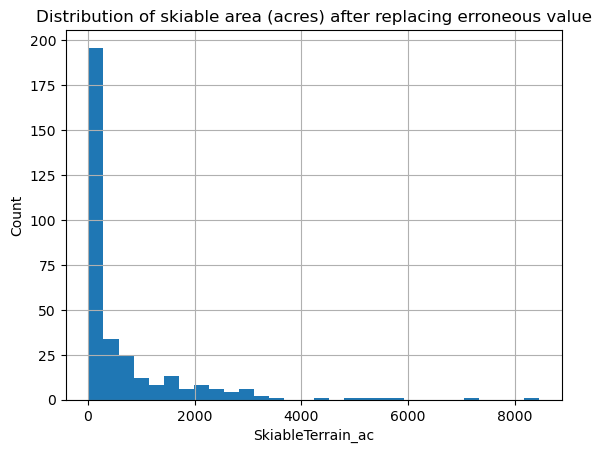

In [45]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

We now see a rather long tailed distribution. To be sure, there are extreme values. The above distribution, however, is plausible, so we leave it unchanged.

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

Our snow making data exhibits a heavy, positive skew. Is this the influence of an outlier?

In [46]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

Observation 11 appears to be an outlier.

In [47]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


While this is vaguely interesting, we have no ticket pricing information at all for this resort, so we will drop this observation from our data frame. 

In [48]:
ski_data.drop([11], axis=0, inplace=True)

##### 2.6.4.2.3 fastEight & yearsOpen<a id='2.6.4.2.3_fastEight'></a>

Below, we explore the `fastEight` values more closely.

In [49]:
ski_data.fastEight.value_counts()

0.0    162
1.0      1
Name: fastEight, dtype: int64

Since most values are either missing or zero, we can safely drop the `fastEight` feature.

In [50]:
ski_data.drop(columns='fastEight', inplace=True)

The distribution of `yearsOpen` has caught our eye. How many resorts have purportedly been open for more than 100 years?

In [51]:
# Filter the 'yearsOpen' column for values greater than 100
ski_data[ski_data.yearsOpen > 100].T

,34,115
Name,Howelsen Hill,Pine Knob Ski Resort
Region,Colorado,Michigan
state,Colorado,Michigan
summit_elev,7136,1308
vertical_drop,440,300
base_elev,6696,1009
trams,0,0
fastSixes,0,0
fastQuads,0,0
quad,0,0


One resort has been open for 104 years. The other has allegedly been open for 2019 years. This is a blatant error, so we drop the observation.

In [52]:
ski_data.drop([115], axis=0, inplace=True)

What does the distribution of `yearsOpen` look like if you exclude just the obviously wrong one?

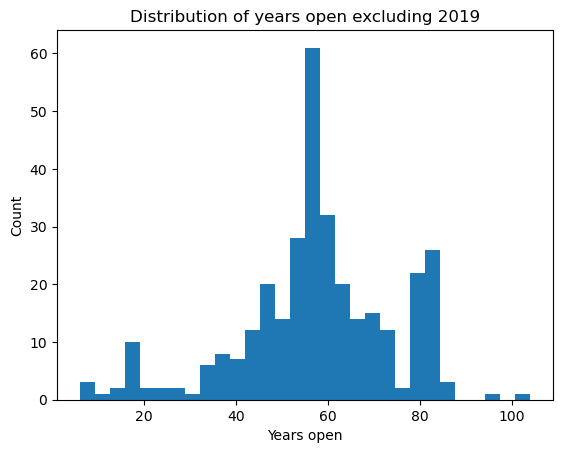

In [53]:
plt.hist(ski_data[ski_data.yearsOpen < 1000]['yearsOpen'], bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible.

Let's review the summary statistics for the years under 1000.

In [54]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    327.000000
mean      57.675841
std       16.863366
min        6.000000
25%       50.000000
50%       58.000000
75%       68.500000
max      104.000000
Name: yearsOpen, dtype: float64

The newest resort has been open for 6 years, while the oldest has been open for 104. We see no reason to doubt that our distribution of `yearsOpen` data is now accurate.

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

These features do not raise major concerns, but we will take care in using them.

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

Many features in our data pertain to chairlifts, that is for getting people around each resort.  Features that we may be interested in are:

* `TerrainParks`
* `SkiableTerrain_ac`
* `daysOpenLastYear`
* `NightSkiing_ac`

When we think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. We might consider the total number of ski runs, but the skiable area seems more informative than just the number of runs.

In [55]:
# Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,20,21148.0,2583.0,78.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

We now return to the features that speak directly to price: `AdultWeekend` and `AdultWeekday`. As before, we calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [56]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.621951
2    14.024390
1     3.353659
dtype: float64

About 14% of the rows have no price data. Given these rows are missing data on our target variable, they can be safely removed.

In [57]:
# `missing_price` used to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

## 2.9 Review Distributions<a id='2.9_Review_distributions'></a>

Let's review the distributions of numerical features now that we have made some changes.

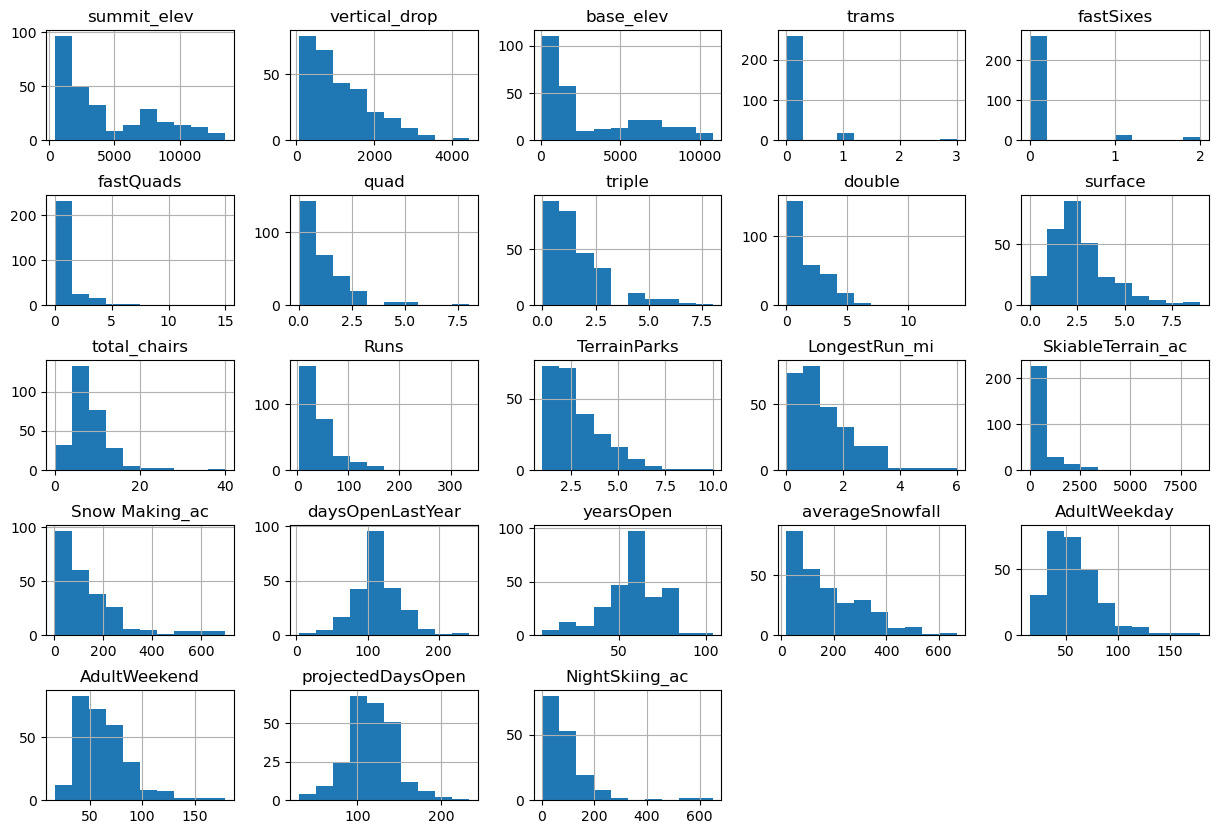

In [58]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

The distributions above seem much more reasonable. There are clearly some skewed distributions. We will keep an eye out for 1) the failure of our model to rate a feature as important when domain knowledge tells us it should be is an issue and 2) extreme values that may influence our model.

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). This table is useful because it allows us to proceed with an analysis that includes state sizes and populations. Intuitively, these are variables that could influence resort prices.

In [59]:
# `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [60]:
type(usa_states)

list

In [61]:
len(usa_states)

1

In [62]:
usa_states = usa_states[0]
usa_states.head()

Name & postal abbs. [1]                                 Cities               \
  Name & postal abbs. [1] Name & postal abbs. [1].1      Capital   Largest[5]   
0                 Alabama                        AL   Montgomery   Birmingham   
1                  Alaska                        AK       Juneau    Anchorage   
2                 Arizona                        AZ      Phoenix      Phoenix   
3                Arkansas                        AR  Little Rock  Little Rock   
4              California                        CA   Sacramento  Los Angeles   

  Established[A] Population [B][3] Total area[4]          Land area[4]  \
  Established[A] Population [B][3]           mi2      km2          mi2   
0   Dec 14, 1819           4903185         52420   135767        50645   
1    Jan 3, 1959            731545        665384  1723337       570641   
2   Feb 14, 1912           7278717        113990   295234       113594   
3   Jun 15, 1836           3017804         53179   137732        52035   
4    Sep 9, 1850          39512223        163695   423967       155779   

           Water area[4]         Number of Reps.  
       km2           mi2     km2 Number of Reps.  
0   131171          1775    4597               7  
1  1477953         94743  245384               1  
2   294207           396    1026               9  
3   134771          1143    2961               4  
4   403466          7916   20501              53

Note that two layers of column headings are at work in the above table.

In [63]:
# get the pandas Series for column number 4 from `usa_states`
established = usa_states.iloc[:, 4]

In [64]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

We want each state's name, population, and total area (square miles).

In [65]:
# Extract columns 0, 5, and 6 and the dataframe's `copy()` method
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


Below, we check whether all states for which we have ski data are accounted for.

In [66]:
# Find the states in `state_summary` that are not in `usa_states_sub`
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

It appears as though we are missing data on certain states. 

The website data contains a reasonable explanation for why 'Massachusetts', 'Pennsylvania', 'Rhode Island', and 'Virginia' are missing from usa_states_sub: There are brackets and abbreviations after these names.

In [67]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

We should delete the square brackets seen above and their contents then try again.

In [68]:
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

Having edited the data, let's verify that all states are now present.

In [69]:
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

We now have an empty set for missing states. Thus, we confidently add the population and state area columns to our ski resort data.

In [70]:
# combine our new data with 'usa_states_sub'
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,20,21148.0,2583.0,78.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


We will merge our data sets in our next notebook, in which we explore our data.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

Finally, we return to our most important question: Which ticket price(s) will we model?

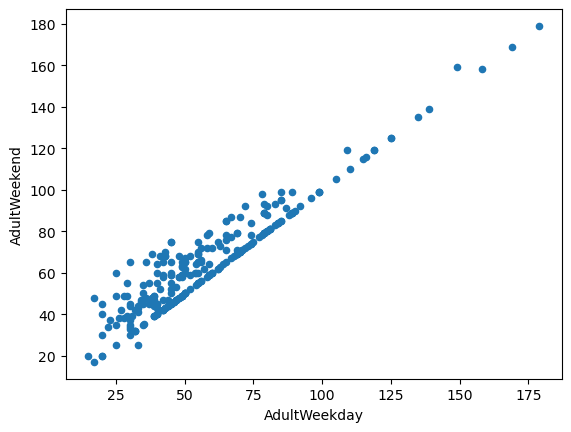

In [71]:
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

There is a clear line where `AdultWeekend` and `AdultWeekday` prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distributions for weekday and weekend prices in Montana seemed equal. This is confirmed by the table below.

In [72]:
# print 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend','AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


Once again, we see that weekend prices have the fewest missing values of the two ticket types, so we drop the weekday prices and keep only those rows that have weekend price.

In [73]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [74]:
ski_data = ski_data.copy(deep=True)
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

Having made these adjustments, we should check the overall shape of our data frame to ascertain if it is reasonable.

In [75]:
ski_data.shape

(278, 25)

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness exists in the remaining rows?

In [76]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
74,5,20.0
141,5,20.0
146,5,20.0
86,5,20.0
184,4,16.0
264,4,16.0
88,4,16.0
96,4,16.0


These seem possibly curiously quantized...

In [77]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

Yes, the percentage of missing values per row appear in multiples of 4.

In [78]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     11
20.0      6
Name: %, dtype: int64

It's almost as if values have been removed artificially. Nevertheless, we don't know how useful the missing features are in predicting ticket price. Thus, we shouldn't just drop rows that are missing data.

In [79]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               278 non-null    object 
 1   Region             278 non-null    object 
 2   state              278 non-null    object 
 3   summit_elev        278 non-null    int64  
 4   vertical_drop      278 non-null    int64  
 5   base_elev          278 non-null    int64  
 6   trams              278 non-null    int64  
 7   fastSixes          278 non-null    int64  
 8   fastQuads          278 non-null    int64  
 9   quad               278 non-null    int64  
 10  triple             278 non-null    int64  
 11  double             278 non-null    int64  
 12  surface            278 non-null    int64  
 13  total_chairs       278 non-null    int64  
 14  Runs               275 non-null    float64
 15  TerrainParks       234 non-null    float64
 16  LongestRun_mi      273 non

## 2.12 Save data<a id='2.12_Save_data'></a>

In [80]:
ski_data.shape

(278, 25)

We save our work to our data directory, separately. Note that we were provided with the data in `raw_data`, and we should save derived data in a separate location. This guards against overwriting our original data.

In [83]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/ski_data_cleaned.csv"


In [82]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/state_summary.csv"


## 2.13 Summary<a id='2.13_Summary'></a>

* The above analysis is the first step in answering the question of what Big Mountain's optimal price might be. 
* The data set contained 330 rows, each representing a resort, and 27 features.
* 34 states are included in the data set.
* Data integrity checks were run using `.isnull`, as were checks for missing values coded as "extreme" integers (e.g., -1, 999).
* An initial review of the data revealed the feature `fastEight` was missing ~50% of observations and, thus, was dropped.
* `AdultWeekday` and `AdultWeekend` data were missing ~16% and ~15% of values, respectively, both prices were present for our target resort.
* 47 resorts were missing both ticket prices, though only one was domiciled in Montana. These observations were also dropped.
* No duplicate resorts were inadvertently included in the data.
* Features such as `SkiState` and `Region` were disambiguated. Our 38 regions were spread across 25 states. The variables failed to coincide 33 times owing to multiple divisions in CA, OR, and UT.
* Variance among ticket prices by was considerable in many, though not all, ski destinations. Considerable interquartile spread was witnessed in UT, NV, NH, ME, and CA. Montana exhibited very little.
* Most prices were range bound between 25.00 and 100.00.
* 82% of resorts contain all data, while ~14% are missing at least one data point.
* Features of interest were identified based on a review of their respective distributions combined with knowledge of missing values and domain knowledge.
* Adjustments for missing values normalized some of their distributions, however, many have a distinctive positive skew due to the data's inability to go below zero for most predictors and potential outliers.
* Resort data were supplemented by state-level data fetched from the web. These data provided insight into state populations and total area.
* Per Montana specifically, more weekday prices were missing than weekend. The `AdultWeekday` feature was, therefore, dropped, and we will focus on modeling weekend pricing, going forward.
* Missing values across all resorts revealed a quantile pattern. This indicates systematic removal of information from this data set.